In [ ]:
from __future__ import division, print_function
%matplotlib inline

# Quantifying spinal cord regeneration in zebrafish

We want to quantify the amount of fluorescent cells in a wounded zebrafish embryo spinal column:

<img src="images/zebrafish-spinal-cord-color.png" alt="Zebrafish spinal cord" style="width: 300px;"/>

The key steps are:

- estimating the position and width of the cord
- estimating the average fluorescence along the length of the cord

In [1]:
from matplotlib import pyplot as plt, cm
from skimage import io
image = io.imread('images/zebrafish-spinal-cord.png')

# SciPy to estimate coordinates

First, we get just the top and bottom rows of pixels, and use a 1D gaussian filter to smooth the signal.

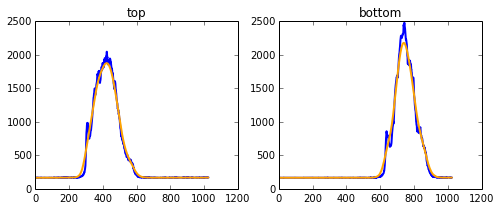

In [2]:
from scipy import ndimage as nd
top, bottom = image[[0, -1], :]

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))

top_smooth = nd.gaussian_filter1d(top, sigma=20)
ax0.plot(top, color='blue', lw=2)
ax0.plot(top_smooth, color='orange', lw=2)
ax0.set_title('top')

bottom_smooth = nd.gaussian_filter1d(bottom, sigma=20)
ax1.plot(bottom, color='blue', lw=2)
ax1.plot(bottom_smooth, color='orange', lw=2)
ax1.set_title('bottom')

With smooth curves, we can get the mode (the position of the center) and width of the signal.

In [3]:
top_mode = top_smooth.argmax()
top_max = top_smooth[top_mode]
top_width = (top_smooth > float(top_max) / 2).sum()

bottom_mode = bottom_smooth.argmax()
bottom_max = bottom_smooth[bottom_mode]
bottom_width = (bottom_smooth > float(bottom_max) / 2).sum()

width = max(bottom_width, top_width)

print(top_mode, top_width, bottom_mode, bottom_width)

(421, 181, 739, 142)


# scikit-image to trace the profile

Now, use `measure.profile_line` to trace from (0, `top_mode`) to (-1, `bottom_mode`).

In [8]:
from skimage import measure
trace = measure.profile_line(image, (0, top_mode),
                             (image.shape[0] - 1, bottom_mode),
                             linewidth=width,
                             mode='reflect')

Finally, plot the trace.

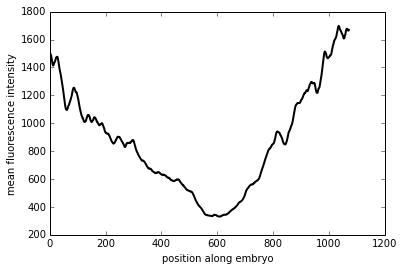

In [9]:
plt.plot(trace, color='black', lw=2)
plt.xlabel('position along embryo')
plt.ylabel('mean fluorescence intensity')

From this trace, we can compute various summary statistics (e.g. min/max, gap width, slope, etc), and plot these over time as the wound recovers.